Material adapted from https://kodu.ut.ee/~kmoch/geopython2019/L4/raster.html
and http://patrickgray.me/open-geo-tutorial/chapter_3_visualization.html


Imports

In [1]:
import geopandas as gpd
import rasterio, descartes, ipyleaflet
import os
import fiona
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask

Set working directory

In [2]:
wdir = r'G:/My Drive/Projects/geode/tutorials/pythontutorial'

Set file names

In [3]:
# Year 2000 intact forest landscapes
iflPath2000 = 'ifl_239_276_2000.shp'
# Year 2020 intact forest landscapes
iflPath2020 = 'ifl_239_276_2020.shp'

# Year 2000 dispersal probability surface
dpsPath2000 = 'corr_2000_239_276.tif'
# Year 2020 dispersal probability surface
dpsPath2020 = 'corr_2020_239_276.tif'

# Protected areas
pasPath = 'bz_pa.shp'

Read a tif of the probability of dispersal between two intact forest landscapes in the year 2000

In [4]:
ds1 = rasterio.open(wdir + '/' + dpsPath2000)

Describe it

In [5]:
print(ds1.name)
print(ds1.width)
print(ds1.height)
print(ds1.crs)
print(ds1.bounds)

G:/My Drive/Projects/geode/tutorials/pythontutorial/corr_2000_239_276.tif
1499
2730
PROJCS["sinusoidal_sa",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",-65],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=221242.9143, bottom=-975185.1668, right=356152.9143, top=-729485.1668)


In [6]:
# A more comprehensive description
print(ds1.profile)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 1499, 'height': 2730, 'count': 1, 'crs': CRS.from_wkt('PROJCS["sinusoidal_sa",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",-65],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(90.0, 0.0, 221242.9143,
       0.0, -90.0, -729485.1668), 'tiled': False, 'interleave': 'band'}


Each raster dataset can have several bands. Each band in Python and Rasterio is essentially handled as a Numpy array.

In [7]:
# Read the first band to a variable and print
dps00 = ds1.read(1)
dps00

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

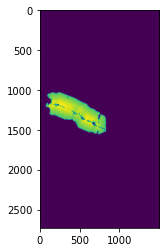

<AxesSubplot:>

In [8]:
# Plot the first band
show(dps00)

In [9]:
# Calculate summary stats of dispersal probabilities
print('min is ' + str(np.min(dps00)))
print('max is ' + str(np.max(dps00)))
print('mean is ' + str(np.mean(dps00)))
print('mean in year 2000 corridor is ' + str(np.mean(dps00[dps00 > 0])))

min is 0.0
max is 0.87280124
mean is 0.03635394
mean in year 2000 corridor is 0.7270521


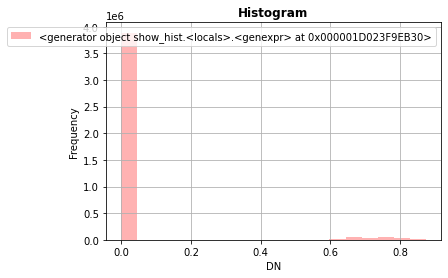

In [10]:
# Plot histogram of raster values
show_hist(ds1, bins=19, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

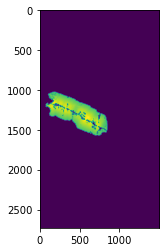

mean in year 2000 corridor is 0.7270521
mean in year 2020 corridor is 0.69793385


In [11]:
# Read in year 2020 dispersal probability surface
ds2 = rasterio.open(wdir + '/' + dpsPath2020)
dps20 = ds2.read(1)
show(dps20)
print('mean in year 2000 corridor is ' + str(np.mean(dps00[dps00 > 0])))
print('mean in year 2020 corridor is ' + str(np.mean(dps20[dps20 > 0])))

Plot side by side

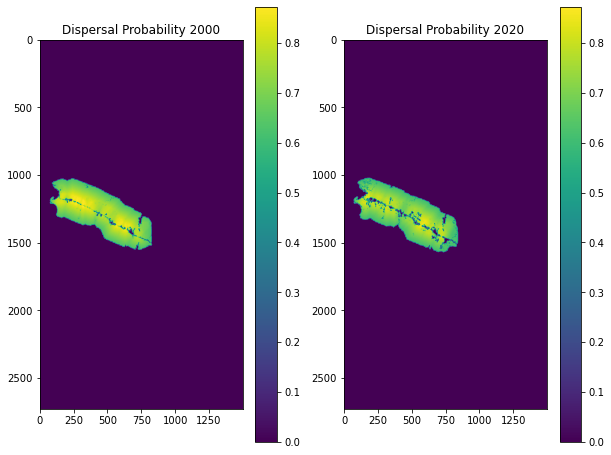

In [12]:
# 2by plot using matplotlib object oriented approach
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8)) # 2 axes on a 1x2 grid
# find max probability to put them on the same colorbar scale
max_prob = np.amax([np.amax(dps00), np.amax(dps20)])
# 2000 probs
dps00ax = ax1.imshow(dps00)
ax1.set_title("Dispersal Probability 2000")
dps00ax.set_clim(vmin=0, vmax=max_prob)
fig.colorbar(dps00ax, ax=ax1)

# 2020 probs
dps20ax = ax2.imshow(dps20)
ax2.set_title("Dispersal Probability 2020")
dps20ax.set_clim(vmin=0, vmax=max_prob)
fig.colorbar(dps20ax, ax=ax2)

Read in PAs and print

In [13]:
pas = gpd.read_file(wdir + '/' + pasPath)
pas


,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,GOV_TYPE,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,geometry
0,33865.0,33865,1,Ipixuna,Ipixuna,Terra Indígena,Indigenous Area,National,Not Reported,Not Applicable,...,Indigenous peoples,Not Reported,Not Reported,Not Reported,State Verified,905,BR-AM,BRA,BRA,"POLYGON ((291341.400 -774015.555, 291677.159 -..."
1,33904.0,33904,1,Tenharim Marmelos,Tenharim Marmelos,Terra Indígena,Indigenous Area,National,Not Reported,Not Applicable,...,Indigenous peoples,Not Reported,Not Reported,Not Reported,State Verified,905,BR-AM,BRA,BRA,"POLYGON ((312705.595 -863906.472, 338618.883 -..."
2,33890.0,33890,1,Nove de Janeiro,Nove de Janeiro,Terra Indígena,Indigenous Area,National,Not Reported,Not Applicable,...,Indigenous peoples,Not Reported,Not Reported,Not Reported,State Verified,905,BR-AM,BRA,BRA,"POLYGON ((293638.865 -794493.780, 293724.192 -..."
3,33895.0,33895,1,Pirahã,Pirahã,Terra Indígena,Indigenous Area,National,Not Reported,Not Applicable,...,Indigenous peoples,Not Reported,Not Reported,Not Reported,State Verified,905,BR-AM,BRA,BRA,"POLYGON ((289108.072 -818229.121, 289030.507 -..."
4,352361.0,352361,1,Diahui,Diahui,Terra Indígena,Indigenous Area,National,Not Reported,Not Applicable,...,Indigenous peoples,Not Reported,Not Reported,Not Reported,State Verified,905,BR-AM,BRA,BRA,"POLYGON ((296794.800 -872712.318, 296725.688 -..."
5,352354.0,352354,1,Tenharim Marmelos (Gleba B),Tenharim Marmelos (Gleba B),Terra Indígena,Indigenous Area,National,Not Reported,Not Applicable,...,Indigenous peoples,Not Reported,Not Reported,Not Reported,State Verified,905,BR-AM,BRA,BRA,"POLYGON ((354760.770 -813706.946, 359969.656 -..."
6,198350.0,198350,1,Floresta Nacional De Humaitá,Floresta Nacional De Humaitá,Floresta,Forest,National,VI,Not Applicable,...,Federal or national ministry or agency,Not Reported,Instituto Chico Mendes de Conservação da Biodi...,Not Reported,State Verified,1802,BR-AM,BRA,BRA,"POLYGON ((225205.813 -835356.410, 236699.117 -..."


The fiona library works actually under the hood of geopandas. With fiona we can open vector/feature datasets directly without loading them into a dataframe. This is required for masking rasters.

In [14]:
# Read ifls to geoms and print
with fiona.open(wdir + '/' + iflPath2000, "r") as shapefile:
    geoms = [feature["geometry"] for feature in shapefile]
geoms

[{'type': 'Polygon',
  'coordinates': [[(275309.8391997491, -935931.1429558754),
    (275207.9948962252, -935872.9434867469),
    (275164.9260856832, -935842.2503240213),
    (274438.74363292055, -935499.140874662),
    (274416.09277950524, -935494.0780857712),
    (274393.9233908467, -935479.4170930249),
    (274240.49693821714, -935430.0549023417),
    (272892.43168699916, -935114.0525287589),
    (272663.24368605745, -935087.789316202),
    (272620.34285371733, -935096.3327708489),
    (272585.9324426986, -935090.8480839131),
    (271230.9701204348, -935197.6940070025),
    (270553.14823016233, -935238.9346361792),
    (270173.8230979522, -935106.8802457737),
    (270169.2070431605, -935106.1419225344),
    (270146.5767159099, -935097.7039425855),
    (269353.80793906585, -934847.2014280361),
    (269219.5590688059, -934826.6001344582),
    (269052.0703725203, -934800.8980190634),
    (268860.82359863847, -934819.4615724349),
    (268046.5801064014, -934978.622954186),
    (267209.0

<AxesSubplot:>

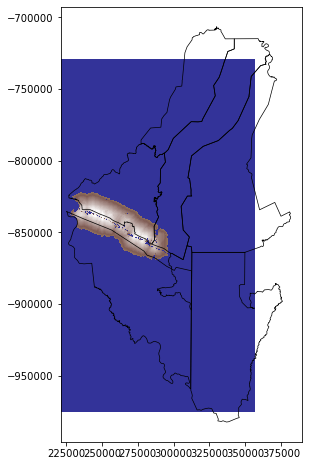

In [15]:
# Plot PAs over corridor
fig, ax = plt.subplots(1, figsize=(10, 8))
show((ds1, 1), cmap='terrain', interpolation='none', ax=ax)
# Need descartes for this
pas.plot(ax=ax, facecolor="none", edgecolor='black', lw=0.7)

In [16]:
# Crop year 2000 dispersal probability surface to PAs
dps00inPA, dps00inPATransform = mask(dataset=ds1, shapes=geoms, crop=True)
print('year 2000 mean dp in PA is ' + str(np.mean(dps00inPA[dps00inPA > 0])))
# Crop year 2020 dispersal probability surface to PAs
dps20inPA, dps20inPATransform = mask(dataset=ds2, shapes=geoms, crop=True)
print('year 2020 mean dp in PA is ' + str(np.mean(dps20inPA[dps20inPA > 0])))

year 2000 mean dp in PA is 0.7139251
year 2020 mean dp in PA is 0.688464


In [17]:
# Invert mask on year 2000 dispersal probability surface to grab values outside PAs
dps00notinPA, dps00notinPATransform = mask(dataset=ds1, shapes=geoms, invert=True, crop=False)
print('year 2000 mean dp outside PA is ' + str(np.mean(dps00notinPA[dps00notinPA > 0])))
# Invert mask on year 2020 dispersal probability surface to grab values outside PAs
dps20notinPA, dps20notinPATransform = mask(dataset=ds2, shapes=geoms, invert=True, crop=False)
print('year 2020 mean dp outside PA is ' + str(np.mean(dps20notinPA[dps20notinPA > 0])))
# Need to manually close file objects
ds1.close()
ds2.close()

year 2000 mean dp outside PA is 0.7521234
year 2020 mean dp outside PA is 0.7171582


In [18]:
# Percent decrease inside PA
(0.7139251-0.688464)/0.7139251*100

3.566354509737788

In [19]:
# Percent decrease outside PA
(0.7521234-0.7171582)/0.7521234*100
print(dpsPath2000.replace('.tif','_masked.tif'))

corr_2000_239_276_masked.tif


What if we want to save a masked array?

In [20]:
# Use existing fiona geometry objects
# Use with context manager (automatically closes file objects)
# Use existing tiff as template
with rasterio.open(wdir + '/' + dpsPath2000) as src:
    out_meta = src.meta
    out_image, out_transform = rasterio.mask.mask(src, shapes=geoms, crop=True)

    profile = src.profile
    profile["height"] = out_image.shape[1]
    profile["width"] = out_image.shape[2]
    profile["transform"] = out_transform

    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open(wdir + '/' + dpsPath2000.replace('.tif','_masked.tif'), "w", **out_meta) as dest:
    dest.write(out_image)

# Pathlib is a useful module. Here use to check if file was created.
from pathlib import Path
Path(wdir + '/' + dpsPath2000.replace('.tif','_masked.tif')).exists()

True

In [21]:
# What if we have categorical data?
# Convert probability values to ranks
bins = [0, 0.25, 0.5, 0.75, 1]
probRanks00 = np.digitize(dps00, bins)
# Calculate rank counts
unique, counts = np.unique(probRanks00, return_counts=True)
print(np.asarray((unique, counts)).T)


[[      1 3887649]
 [      3  125715]
 [      4   78906]]


In [22]:
# Lowest rank is inflated due to fill values
probRanks00 = np.digitize(dps00[dps00 > 0], bins)
# Calculate rank counts
unique, counts = np.unique(probRanks00, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     3 125715]
 [     4  78906]]


Visualize with Leaflet

In [23]:
from ipyleaflet import Map, basemaps
Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)


Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [29]:
# Need lat lon for basemap
pas_repro  = pas.to_crs({'init': 'epsg:4326'})
# Returns a tuple containing minx, miny, maxx, maxy
bbox = pas_repro.total_bounds
print(bbox)

# Use bounding box coords to center map
#map = Map(center = (53.48, -2.24), basemap=basemaps.Esri.WorldImagery)
map = Map(center = (np.mean([bbox[1],bbox[3]]),np.mean([bbox[0],bbox[2]])), basemap=basemaps.Esri.WorldImagery)
map

[-62.95934754  -8.88312102 -61.5416581   -6.38831794]
-62.25050281949993


Map(center=[-7.635719478499936, -62.25050281949993], controls=(ZoomControl(options=['position', 'zoom_in_text'…